# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 -11.91 -12.19 23.95 8.42 ... 460.2 367.6 435.1

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.8/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


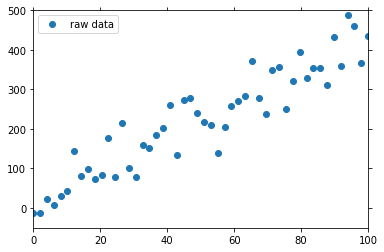

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

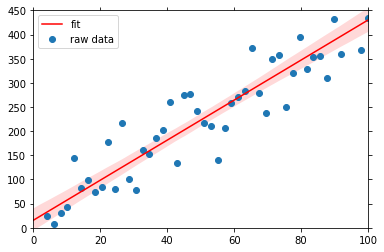

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 15.61285896,  19.80012718,  23.98739539,  28.17466361,
         32.36193183,  36.54920005,  40.73646827,  44.92373649,
         49.11100471,  53.29827293,  57.48554114,  61.67280936,
         65.86007758,  70.0473458 ,  74.23461402,  78.42188224,
         82.60915046,  86.79641868,  90.98368689,  95.17095511,
         99.35822333, 103.54549155, 107.73275977, 111.92002799,
        116.10729621, 120.29456443, 124.48183265, 128.66910086,
        132.85636908, 137.0436373 , 141.23090552, 145.41817374,
        149.60544196, 153.79271018, 157.9799784 , 162.16724661,
        166.35451483, 170.54178305, 174.72905127, 178.91631949,
        183.10358771, 187.29085593, 191.47812415, 195.66539236,
        199.85266058, 204.0399288 , 208.22719702, 212.41446524,
        216.60173346, 220.78900168, 224.9762699 , 229.16353812,
        233.35080633, 237.53807455, 241.72534277, 245.91261099,
        250.09987921, 254.28714743, 258.47441565, 262.66168387,
        266.84895208, 271.0362203 , 275.22348852, 279.41075674,
        283.59802496, 287.78529318, 291.9725614 , 296.15982962,
        300.34709783, 304.53436605, 308.72163427, 312.90890249,
        317.09617071, 321.28343893, 325.47070715, 329.65797537,
        333.84524359, 338.0325118 , 342.21978002, 346.40704824,
...
        117.58507401, 121.61446066, 125.52942866, 129.28645893,
        133.07683621, 136.89676487, 140.71669352, 144.73344843,
        148.94798154, 153.029165  , 157.10920213, 161.14830274,
        165.03893461, 168.98520675, 172.90828273, 176.92681287,
        181.13611405, 185.14569363, 189.24895601, 193.21372093,
        197.37114173, 201.27956883, 205.05729429, 209.19378049,
        213.28497269, 217.17119314, 221.31102644, 225.59610329,
        229.86036455, 233.91213386, 238.40792761, 242.53449557,
        246.59173578, 250.68832838, 255.16416206, 259.33290892,
        263.64539786, 267.96455941, 272.16672983, 276.66514721,
        281.06852994, 285.38320325, 289.65416636, 294.13721231,
        298.49331023, 302.84933777, 307.20521143, 311.61222248,
        316.11186834, 320.61985051, 325.17349296, 329.7468407 ,
        334.19129298, 338.77634073, 343.3338133 , 347.90676093,
        352.38210512, 356.75446024, 361.12013688, 365.58622008,
        370.08330449, 374.42612632, 378.91065146, 383.41087755,
        387.9102732 , 392.40682317, 396.87242676, 401.25609151,
        405.6411374 , 410.02977117, 414.41840494, 418.8159113 ,
        423.40497887, 427.99404645, 432.58311403, 437.1721816 ,
        441.74417879, 446.14082707, 450.7986038 , 455.38887124]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      4.145395536612431
    intercept:  15.612858956293515
    rsquared:   0.8721339238262962

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

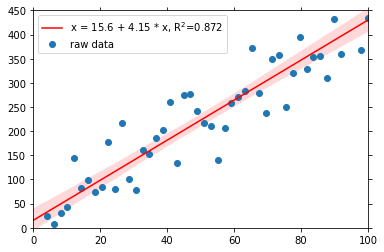

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

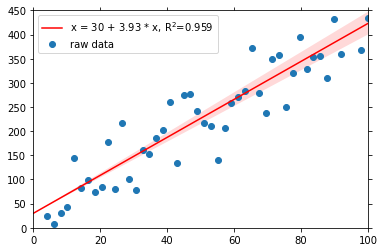

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

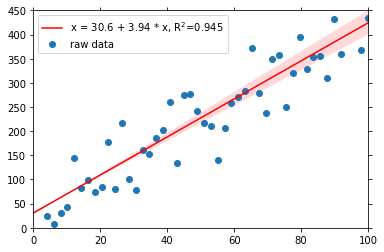

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')